# Financial Applications of Machine Learning - Assignment 3

For this assignment use data at: “https://www.kaggle.com/wendykan/lending-club-loan-data/download”

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

1.	Read the data and do the preprocessing similar to the GBM file submitted to eLearning. Try not to exclude any variable as much as possible.

In [2]:
data=pd.read_csv("loan.csv", low_memory=False)

In [3]:
# Exploring the data
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [4]:
print(data.shape)

(2260668, 145)


In [5]:
#let us explore the target column
target='loan_status'
print(data.groupby([target])['loan_amnt'].count())

loan_status
Charged Off                                             261655
Current                                                 919695
Default                                                     31
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1041952
In Grace Period                                           8952
Late (16-30 days)                                         3737
Late (31-120 days)                                       21897
Name: loan_amnt, dtype: int64


In [7]:
#let us transform loan_status to good or bad (i.e. 1 or 0)
status = {
    'Charged Off': 'bad',
    'Current': 'good',
    'Default': 'bad',
    'Does not meet the credit policy. Status:Charged Off': 'bad',
    'Does not meet the credit policy. Status:Fully Paid': 'good',
    'Fully Paid': 'good',
    'In Grace Period': 'bad',
    'Late (16-30 days)': 'bad',
    'Late (31-120 days)': 'bad'
}
data['loan_status'] = data['loan_status'].map(lambda x: status[x])

In [8]:
print(data.groupby([target])['loan_amnt'].count())

loan_status
bad      297033
good    1963635
Name: loan_amnt, dtype: int64


In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,5.000000e+02,8000.0000,12900.000000,20000.000000,4.000000e+04
funded_amnt,2260668.0,15041.664057,9188.413022,5.000000e+02,8000.0000,12875.000000,20000.000000,4.000000e+04
funded_amnt_inv,2260668.0,15023.437624,9192.331807,0.000000e+00,8000.0000,12800.000000,20000.000000,4.000000e+04
int_rate,2260668.0,13.092913,4.832114,5.310000e+00,9.4900,12.620000,15.990000,3.099000e+01
installment,2260668.0,445.807646,267.173725,4.930000e+00,251.6500,377.990000,593.320000,1.719830e+03
annual_inc,2260664.0,77992.428687,112696.199574,0.000000e+00,46000.0000,65000.000000,93000.000000,1.100000e+08
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,2258957.0,18.824196,14.183329,-1.000000e+00,11.8900,17.840000,24.490000,9.990000e+02


In [10]:
pd.DataFrame(data.isna().sum(),columns=['Count of NaN']).sort_values(by=['Count of NaN'],ascending=False)

,Count of NaN
id,2260668
url,2260668
member_id,2260668
orig_projected_additional_accrued_interest,2252242
hardship_length,2250055
hardship_reason,2250055
hardship_status,2250055
deferral_term,2250055
hardship_amount,2250055
hardship_start_date,2250055


In [11]:
#drop all rows with missing values in target column loan_status
data.dropna(subset=[target], inplace=True)

In [12]:
#drop columns with too many NaN values
data.dropna(axis='columns', thresh=data.shape[0]*0.99, inplace=True)

In [14]:
data.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,RENT,55000.0,Not Verified,Dec-2018,good,n,debt_consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Feb-2019,0.0,1,Individual,0,0.0,0.0,1.0,0.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,MORTGAGE,90000.0,Source Verified,Dec-2018,good,n,debt_consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Feb-2019,0.0,1,Individual,0,0.0,0.0,1.0,0.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,MORTGAGE,59280.0,Source Verified,Dec-2018,good,n,debt_consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,Feb-2019,180.69,Feb-2019,0.0,1,Individual,0,0.0,0.0,0.0,0.0,N,Cash,N


In [15]:
data.shape

(2260668, 50)

In [16]:
def value_is_string(value):
    return isinstance(value, str)

def column_has_string(column):
    values = column.dropna()
    for value in values:
        if value_is_string(value):
            return True
    
    return False

#convert string to int while retaining missing values
for col in data.columns:
    # if any row in column is a string
    if column_has_string(data[col]):  
        # find non empty values
        values = data[col].dropna()
        # find unique strings in column
        encoding = np.unique(values).tolist()
        # replace each string with encoding index
        data[col] = data[col].map(lambda x: encoding.index(x) if value_is_string(x) else x)  

In [17]:
data.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,0,13.56,84.92,2,10,5,55000.0,0,34,1,0,2,101.0,34,18.24,0.0,46.0,1.0,9.0,1.0,4341,10.3,34.0,1,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,45.0,84.92,45.0,0.0,1,0,0,0.0,0.0,1.0,0.0,0,0,0
1,30000,30000,30000.0,1,18.94,777.23,3,16,1,90000.0,1,34,1,0,2,682.0,18,26.52,0.0,414.0,0.0,13.0,1.0,12315,24.2,44.0,1,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,45.0,777.23,45.0,0.0,1,0,0,0.0,0.0,1.0,0.0,0,0,0
2,5000,5000,5000.0,0,17.97,180.69,3,15,1,59280.0,1,34,1,0,2,477.0,22,10.51,0.0,56.0,0.0,8.0,0.0,4599,19.1,13.0,1,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,45.0,180.69,45.0,0.0,1,0,0,0.0,0.0,0.0,0.0,0,0,0


2.	Split the sample to test and train.

In [18]:
from sklearn.model_selection import train_test_split

X = data.drop(target, axis=1, inplace=False)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=123)

3.	Use sklearn to build a GBM model to predict whether a customer has any delinquent account. Do Grid search on as many parameters as you find useful. Include “Number of Trees”, and “Learning Rate” for sure. Use the train sample.

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline


params = {'n_estimators': 3,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1}
pipeline = Pipeline([
    ('imputer', SimpleImputer()),  # fill missing values
    ('selector', VarianceThreshold()),  # drop columns with low variance
    ('scaler', MinMaxScaler()),  # scale values to range [0,1]
    ('classifier', GradientBoostingClassifier(**params))  
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('selector', VarianceThreshold(threshold=0.0)),
                ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('classifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=6,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                    

In [20]:
# calculate AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pipeline.predict(X_test))

0.5

In [21]:
# now we run a grid search on GBM parameters
# save the results to choose the best parameters
results = pd.DataFrame(columns=["# Trees", "Max Features", "Learning Rate",
                                "Max Leaf Nodes", "Min Split","AUC-Train","AUC-Test"])
    
for n_estimators in [1, 2]:
        for max_features in ['sqrt','auto']:
                for learning_rate in [0.1, 0.5]:
                    for max_leaf_nodes in [6, 20]:
                            for min_samples_split in [0.1, 0.3]:
        
                                params = {'n_estimators': n_estimators,  
                                  'max_features':max_features,'max_leaf_nodes':max_leaf_nodes, 
                                  'learning_rate': learning_rate, 
                                  'min_samples_split': min_samples_split,
                                  'subsample':0.8, 'random_state':1}
                                pipeline = Pipeline([
                                    ('imputer', SimpleImputer()),  # fill missing values with mean
                                    ('selector', VarianceThreshold()),  # drop columns with low variance
                                    ('scaler', MinMaxScaler()),  # scale values to range [0,1]
                                    ('classifier', GradientBoostingClassifier(**params))  
                                ])
                                pipeline.fit(X_train, y_train)
                                results.loc[len(results)]=[n_estimators, max_features, learning_rate,
                                               max_leaf_nodes, min_samples_split,
                                               roc_auc_score(y_train, pipeline.predict(X_train)),
                                               roc_auc_score(y_test, pipeline.predict(X_test))]

4.	For each model, store the AUC on the test and train. At the end, choose the best model that gives you the best bias-variance.

In [22]:
#print grid search results
results.sort_values(by=['AUC-Train','AUC-Test'])

,# Trees,Max Features,Learning Rate,Max Leaf Nodes,Min Split,AUC-Train,AUC-Test
0,1,sqrt,0.1,6,0.1,0.500000,0.500000
1,1,sqrt,0.1,6,0.3,0.500000,0.500000
2,1,sqrt,0.1,20,0.1,0.500000,0.500000
3,1,sqrt,0.1,20,0.3,0.500000,0.500000
5,1,sqrt,0.5,6,0.3,0.500000,0.500000
7,1,sqrt,0.5,20,0.3,0.500000,0.500000
8,1,auto,0.1,6,0.1,0.500000,0.500000
9,1,auto,0.1,6,0.3,0.500000,0.500000
10,1,auto,0.1,20,0.1,0.500000,0.500000
11,1,auto,0.1,20,0.3,0.500000,0.500000


In [23]:
#choosing best parameters from grid
params = {'n_estimators': 2,'max_features': 'auto','max_leaf_nodes': 20,
          'learning_rate': 0.5,'min_samples_split': 0.1,'subsample': 0.8, 
          'random_state':1}
pipeline = Pipeline([
    ('imputer', SimpleImputer()),  # fill missing values with mean of column
    ('selector', VarianceThreshold()),  # drop columns with low variance
    ('scaler', MinMaxScaler()),  # scale values to range [0,1]
    ('classifier', GradientBoostingClassifier(**params))  
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('selector', VarianceThreshold(threshold=0.0)),
                ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('classifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.5, loss='deviance',
                                            max_depth=3, max_features='auto',
                                            max_leaf_nodes=20,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=0.1,
               

5.	Draw a histogram for predicted probabilities in each class. Something like the following graph, where for example orange is class 0 and blue is class 1. How should the ideal graph look like?

In [25]:
np.mean(y_test) #86.82% of loan applicants in the test dataset have loan_status as good

0.8682283289717906

In [26]:
y_pred = pipeline.predict_proba(X_test)

In [27]:
predictions = pd.DataFrame(y_pred)

In [28]:
predictions.head(5)

,0,1
0,0.076601,0.923399
1,0.065840,0.934160
2,0.067747,0.932253
3,0.065840,0.934160
4,0.091342,0.908658


In [29]:
predictions.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,565167.0,0.155844,0.240651,0.048481,0.067747,0.067747,0.091342,0.984537
1,565167.0,0.844156,0.240651,0.015463,0.908658,0.932253,0.932253,0.951519


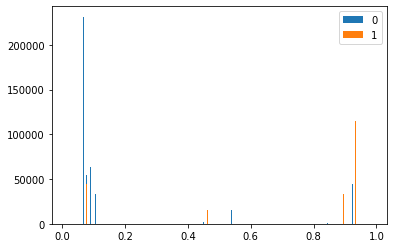

In [30]:
#ideally, 86.82% of bins should be in class 1 near probability 1.0 and 86.82% of bins should be in class 0 near probability 0.0
plt.hist(predictions[0],bins=500,label='0')
plt.hist(predictions[1],bins=500,label='1')
plt.legend(loc='upper right')
plt.show()

The size of orange line near 1 should be equal to the size of blue line near 0. The size of blue line near 1 should be equal to the size of orange line near 0. There should be no lines in the middle. 

# Ensemble Modeling 2

1.	Try to keep as many variables as you can. Use “onehotencoder” to treat non-ordinal variables if needed. 

In [102]:
print("Categorical features have already been encoded.")

Categorical features have already been encoded.


2.	Random Forest is famous as a powerful feature selection technique. Use RF to select the most important features; then use only those features in Grid Search.

In [45]:
X = data.drop(target, axis=1, inplace=False)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=123)

In [46]:
from sklearn.ensemble import RandomForestClassifier


# create a Random Forest Classifier pipeline
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer()),  # fill missing values with mean of column
    ('scaler', MinMaxScaler()),  # scale values to range [0,1]
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=123, n_jobs=-1))  
])
rf_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                             

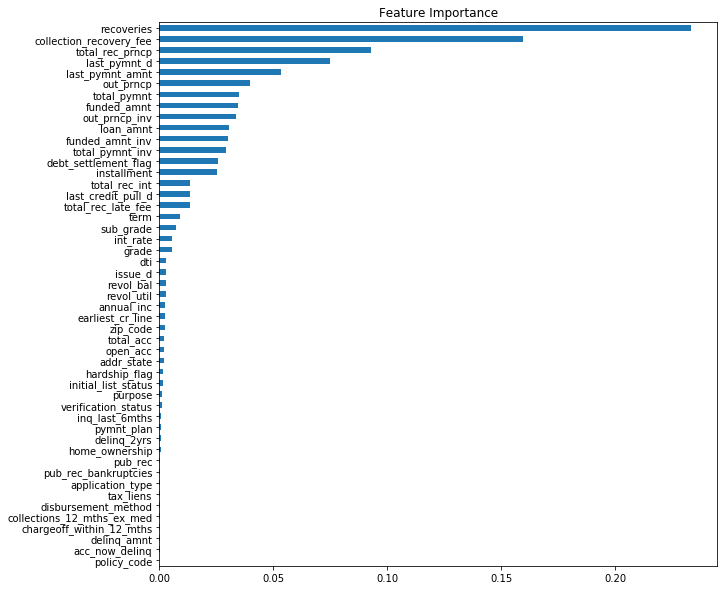

In [56]:
# Plot the name and gini importance of each feature
plt.rcParams["figure.figsize"] = (10, 10)

imp_features=pd.Series(rf_pipeline.named_steps['classifier'].feature_importances_, index=X.columns)
imp_features.sort_values().plot(title='Feature Importance', kind='barh')

In [66]:
#show important features
important_features = list(imp_features[imp_features > 0.05].keys())
X_imp = X[important_features]
X_imp.head()

,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,113.98,0.0,0.0,45.0,84.92
1,612.25,0.0,0.0,45.0,777.23
2,212.79,0.0,0.0,45.0,180.69
3,168.07,0.0,0.0,45.0,146.51
4,660.98,0.0,0.0,45.0,731.78


In [85]:
# perform grid search for GradientBoostingClassifier's parameters on important features

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

sfm = SelectFromModel(rf_pipeline.named_steps['classifier'], threshold=0.05)

param_grid = {
    'n_estimators': [1,2],
    'max_features': [None, 'sqrt'],
    'learning_rate': [0.1, 0.5],
    'max_leaf_nodes': [6, 20],
    'min_samples_split': [0.1, 0.3]
}

pipeline = Pipeline([
    ('imputer', SimpleImputer()),  # fill missing values with mean of column
    ('selector', sfm),  # select only the important features
    ('scaler', MinMaxScaler()),  # scale values to range [0,1]
    ('classifier', GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=3, refit=True, n_jobs=-1))  
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('selector',
                 SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                                  class_weight=None,
                                                                  criterion='gini',
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity...
                                               

In [86]:
roc_auc_score(y_test, pipeline.predict(X_test))

0.787788863077894

In [87]:
pipeline.named_steps['classifier'].cv_results_

{'mean_fit_time': array([ 8.3323075 , 12.99956425,  8.80311998, 13.61092575,  7.68111992,
        12.28313311,  7.94503872, 13.72960639,  6.37755346,  9.56740721,
         5.92715621,  8.93340619,  5.93807729,  8.68408942,  6.67848182,
        10.00160933,  8.10696896, 12.47918169,  7.37789838, 12.29741542,
         8.4094735 , 11.76812212,  7.92610129, 11.7758441 ,  6.84901563,
         8.94397656,  5.949826  ,  9.16638517,  6.44796205,  8.01861723,
         6.11629629,  5.6170574 ]),
 'std_fit_time': array([0.09411625, 0.31902023, 0.28374651, 0.75459279, 0.32563723,
        0.50999766, 0.30356112, 0.46243118, 0.22857698, 0.54070931,
        0.1287437 , 0.27747868, 0.36986003, 0.80111331, 0.88647529,
        0.64924083, 0.35447849, 1.29432918, 0.1711332 , 0.18170813,
        0.62682532, 0.45181892, 0.4878627 , 0.33546022, 0.65580931,
        0.55648314, 0.22888957, 0.39184995, 0.49274514, 0.55119714,
        0.19747145, 0.25366213]),
 'mean_score_time': array([0.48237602, 0.68787305, 

3.	Save the results of the Grid search as an Excel file. Plot how model performance (on test sample) changes as model parameters change. Which parameters have significant impact on model’s performance?

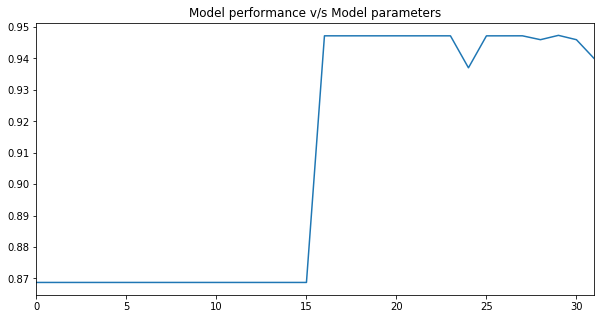

In [88]:
plt.rcParams["figure.figsize"] = (10, 5)

series=pd.Series(pipeline.named_steps['classifier'].cv_results_['mean_test_score'])
series.plot(title='Model performance v/s Model parameters')

In [90]:
results=pipeline.named_steps['classifier'].cv_results_

print(results['params'][14])
print(results['params'][15])
print(results['params'][16])
print(results['params'][17])

{'learning_rate': 0.1, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_split': 0.3, 'n_estimators': 1}
{'learning_rate': 0.1, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_split': 0.3, 'n_estimators': 2}
{'learning_rate': 0.5, 'max_features': None, 'max_leaf_nodes': 6, 'min_samples_split': 0.1, 'n_estimators': 1}
{'learning_rate': 0.5, 'max_features': None, 'max_leaf_nodes': 6, 'min_samples_split': 0.1, 'n_estimators': 2}


In [91]:
print("learning_rate has the highest impact on model performance")

learning_rate has the highest impact on model performance


# Neural Networks

Build a Neural Network, and a Logistic model on the same data (Lending Loan Club). Refer to the NN code, on the eLearning, to do Grid Search. Fix the number of nodes at each layer to five. Play with number of layers, dropout regularization, batch size, and number of epochs. use the same test/train as the one you used for ensemble model. For missing value imputation use your choice; look up the suggestions on the Internet.

In [97]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


def build_classifier():
    # first step: create a Sequential object, as a sequence of layers. B/C NN is a sequence of layers.
    classifier = Sequential()
    
    # add the first hidden layer
    classifier.add(Dense(units=5,kernel_initializer='glorot_uniform',activation = 'relu'))

    # add the second hidden layer
    classifier.add(Dense(units=5,kernel_initializer='glorot_uniform',activation = 'relu'))

    # add the output layer
    classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation = 'sigmoid'))
    
    # compiling the NN
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier


classifier = KerasClassifier(build_fn=build_classifier, batch_size = 10, nb_epoch = 3)

param_grid = {
    'batch_size':[25,32], 
    'nb_epoch':[1,2],
    #'optimizer':['adam','rmsprop']
}

pipeline = Pipeline([
    ('imputer', SimpleImputer()),  # fill missing values with mean of column
    ('selector', sfm),  # select only the important features
    ('scaler', MinMaxScaler()),  # scale values to range [0,1]
    ('classifier', GridSearchCV(classifier, param_grid=param_grid, cv=3, scoring='accuracy', refit=True, n_jobs=-1))  
])
pipeline.fit(X_train, y_train)

Epoch 1/1
1695501/1695501 [==============================] - 44s 26us/step - loss: 0.1685 - accuracy: 0.9417


Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('selector',
                 SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                                  class_weight=None,
                                                                  criterion='gini',
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity...
                ('scaler', MinMaxScaler(copy=Tr

In [98]:
roc_auc_score(y_test, pipeline.predict(X_test))

0.8174180670589175

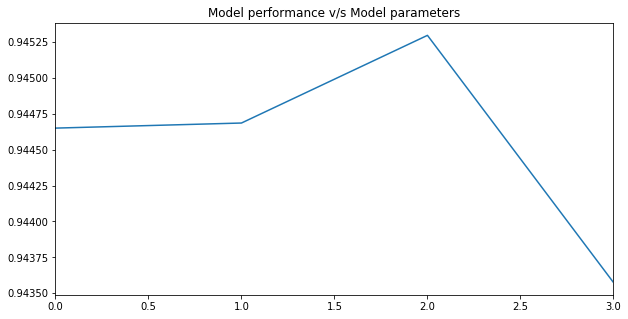

In [99]:
plt.rcParams["figure.figsize"] = (10, 5)

series=pd.Series(pipeline.named_steps['classifier'].cv_results_['mean_test_score'])
series.plot(title='Model performance v/s Model parameters')

In [101]:
results=pipeline.named_steps['classifier'].cv_results_

print(results['params'][0])
print(results['params'][1])
print(results['params'][2])
print(results['params'][3])

{'batch_size': 25, 'nb_epoch': 1}
{'batch_size': 25, 'nb_epoch': 2}
{'batch_size': 32, 'nb_epoch': 1}
{'batch_size': 32, 'nb_epoch': 2}
